Task 1 : Exploratory Data Analysis (EDA) [3 marks]

Questions

1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

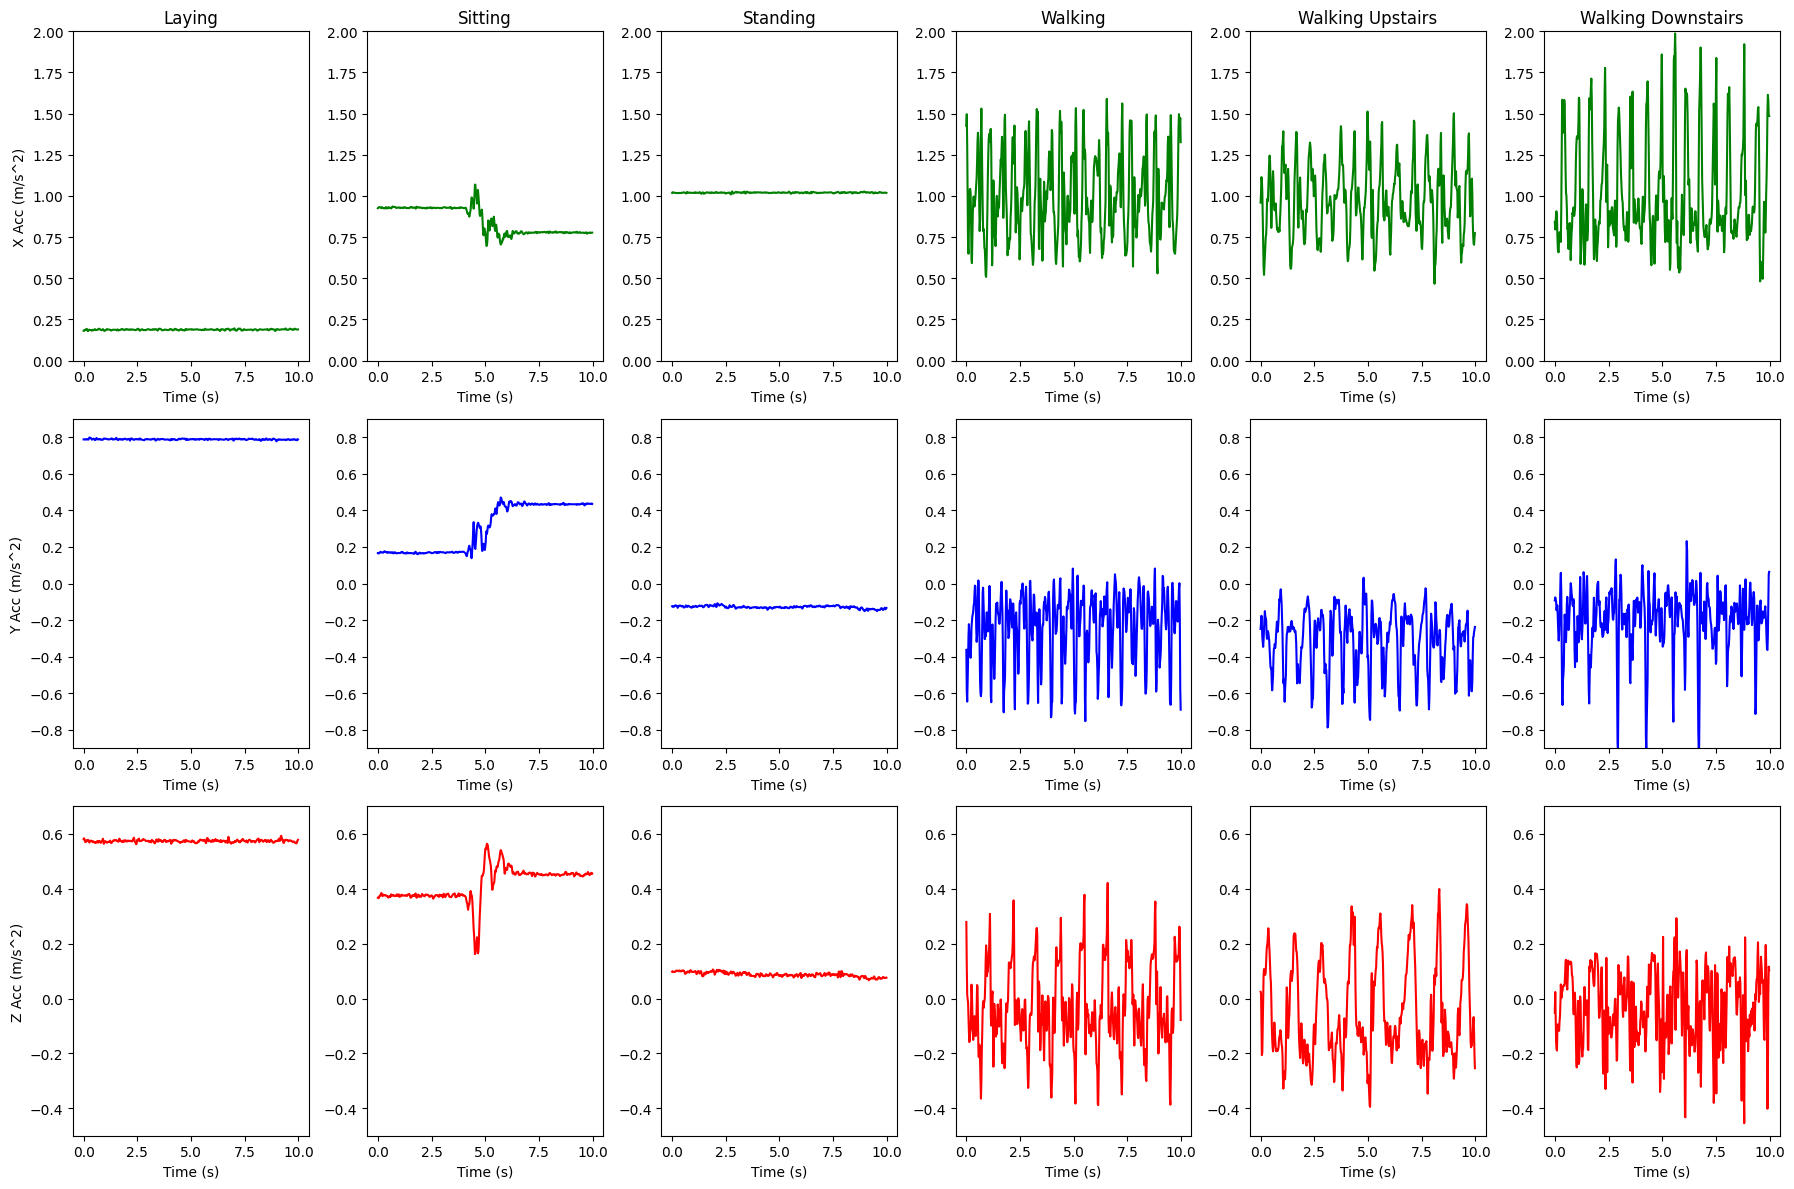

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 12))

# Subplots for each activity 
for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)
    
    x_acc = data['accx'][:500]
    y_acc = data['accy'][:500]
    z_acc = data['accz'][:500]
    
    time = [i/50 for i in range(500)]
    
    # First Row - X acceleration
    plt.subplot(3, 6, i + 1)
    plt.plot(time, x_acc, color='g')
    plt.ylim(0,2)
    plt.title(activities[i])
    if i == 0:
        plt.ylabel('X Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    # Second Row - Y acceleration
    plt.subplot(3, 6, i + 7)
    plt.plot(time, y_acc, color='b')
    plt.ylim(-0.9,0.9)
    if i == 0:
        plt.ylabel('Y Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    # Third Row - Z acceleration
    plt.subplot(3, 6, i + 13)
    plt.plot(time, z_acc, color='r')
    plt.ylim(-0.5,0.7)
    if i == 0:
        plt.ylabel('Z Acc (m/s^2)')
    plt.xlabel('Time (s)')

plt.tight_layout()

plt.show()

Activities such as walking, walking upstairs, and walking downstairs display high variability in acceleration values across all three axes. In contrast, activities like laying, sitting, and standing show much lower variability across the same axes.

When comparing similarities, certain activities share comparable waveform shapes - for example, walking and standing exhibit noticeable resemblance in their patterns.

Overall, the data shows that a model should be able to tell these activities apart. Each activity has its own clear pattern in the waveforms, and the acceleration values usually fall within certain ranges. These differences give the model useful clues to learn from and use for classification.

2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer. [0.5 marks]

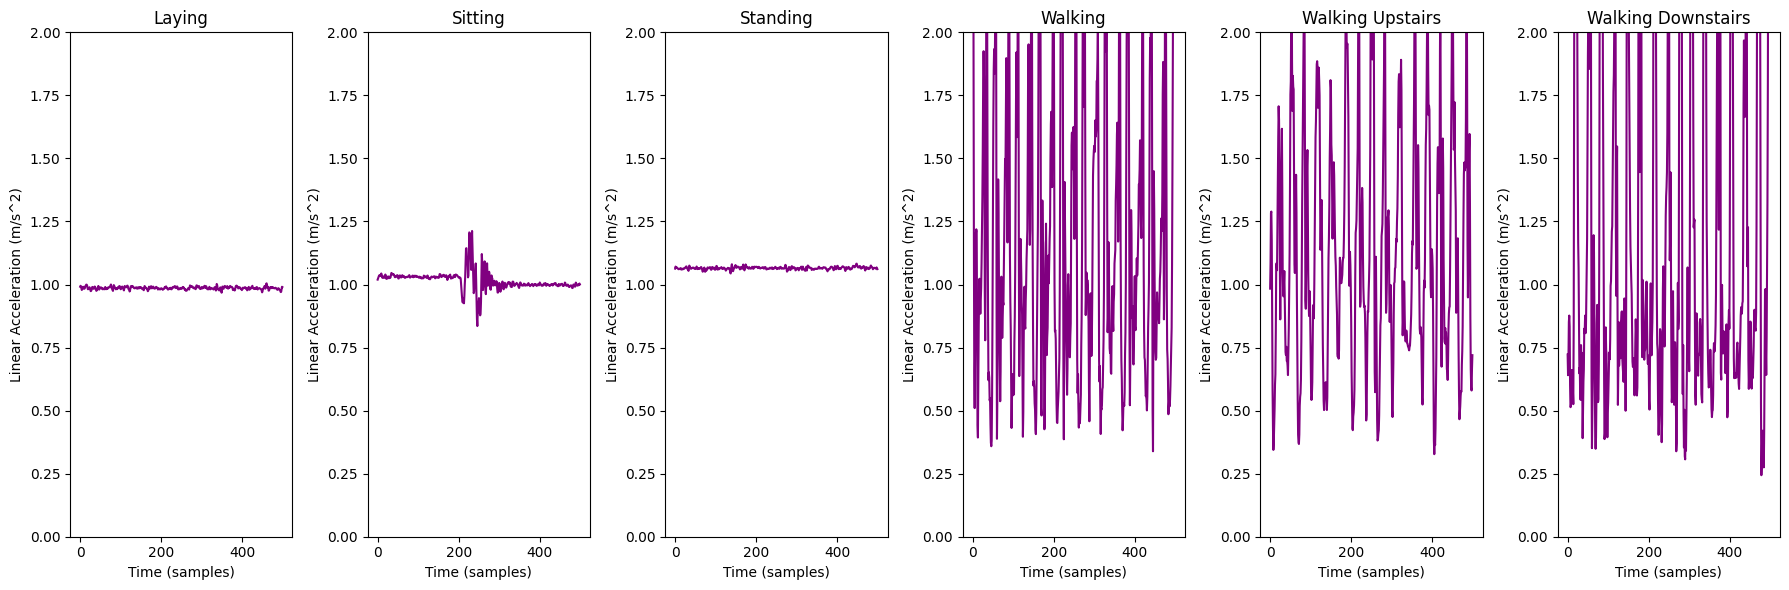

In [ ]:
import numpy as np

files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 6))

# Subplots for each activity
for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)

    linear_acc = data['accx']**2 + data['accy']**2 + data['accz']**2

    plt.subplot(1, 6, i + 1)
    plt.plot(linear_acc[:500], color='purple')
    plt.title(activities[i])
    plt.ylim(0, 2)
    plt.xlabel('Time (samples)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    
plt.tight_layout()
plt.show()

Yes, we do need a machine learning model to properly differentiate between static activities (laying, sitting, standing) and dynamic activities (walking, walking upstairs, walking downstairs). If we look at the linear acceleration magnitude M=acc^2x+acc^2y+acc^2z we can clearly see that for static activities the values remain almost constant with very little variation, while for dynamic activities the values fluctuate a lot and usually take higher ranges. This difference makes it possible for a machine learning model to learn the patterns and separate the two groups.

3. Visualize the data using PCA. [1 marks]
Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


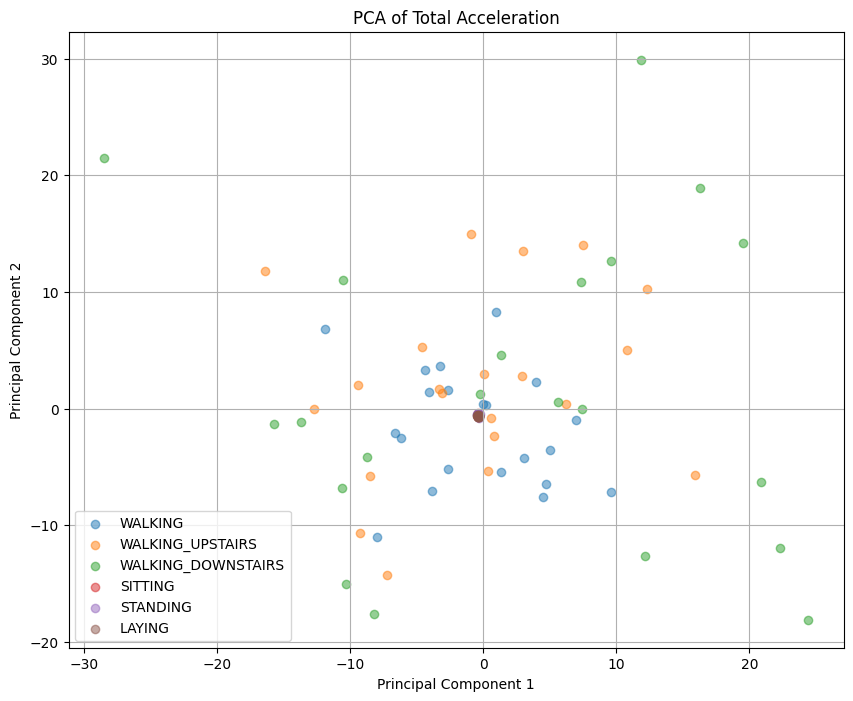

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train, y_train, classes

# Calculate total acceleration 
total_acceleration = np.sum(X_train**2, axis=2)
X_train_2D = total_acceleration.reshape(total_acceleration.shape[0], -1)

# Standardize the feature data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_2D)

# PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scale)

labels = {v: k for k, v in classes.items()}

# Scatter plot
plt.figure(figsize=(10, 8))
activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Total Acceleration')
plt.legend()
plt.grid(True)
plt.show()

Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

Original X_train shape: (126, 500, 3)


C:\Users\Sia\AppData\Local\Temp\ipykernel_20828\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\Sia\AppData\Local\Temp\ipykernel_20828\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\Sia\AppData\Local\Temp\ipykernel_20828\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\Sia\AppData\Local\Temp\ipykernel_20828\2332216862.py:20: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
C:\Users\Sia\AppData\Local\Temp\ipykernel_20828\2332216862.py:20: UserWarning: Using

X_train after TSFEL feature extraction: (126, 42)
X_train after scaling: (126, 42)
X_train after PCA: (126, 2)


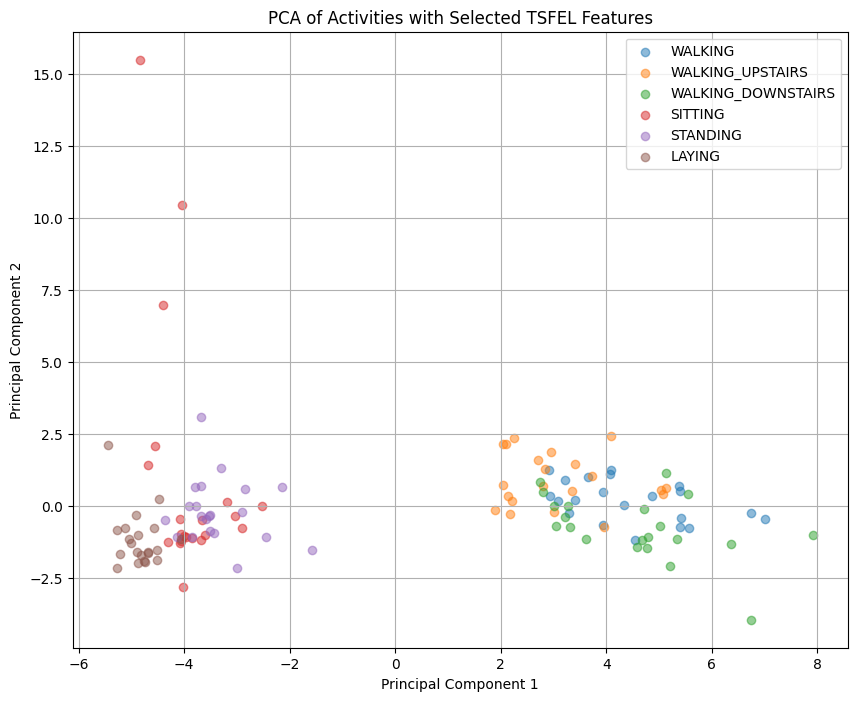

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from MakeDataset import X_train, y_train, classes

# Reshape the data into the shape required by TSFEL (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape
print(f"Original X_train shape: {X_train.shape}")

# Create a custom feature configuration to select only temporal features
cfg = tsfel.get_features_by_domain("temporal")

# Extract the selected features using TSFEL
X_train_tsfel = pd.DataFrame()

for i in range(n_samples):
    tsfel_features = tsfel.time_series_features_extractor(cfg, X_train[i, :, :], verbose=0)
    X_train_tsfel = pd.concat([X_train_tsfel, tsfel_features], axis=0, ignore_index=True)

print(f"X_train after TSFEL feature extraction: {X_train_tsfel.shape}") 

# Standardize the feature data
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)
print(f"X_train after scaling: {X_train_tsfel_scaled.shape}")

# PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tsfel_scaled)
print(f"X_train after PCA: {X_train_pca.shape}") 

# scatter plot
labels = {v: k for k, v in classes.items()}
activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

plt.figure(figsize=(10, 8))

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities with Selected TSFEL Features')
plt.legend()
plt.grid(True)
plt.show()

Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

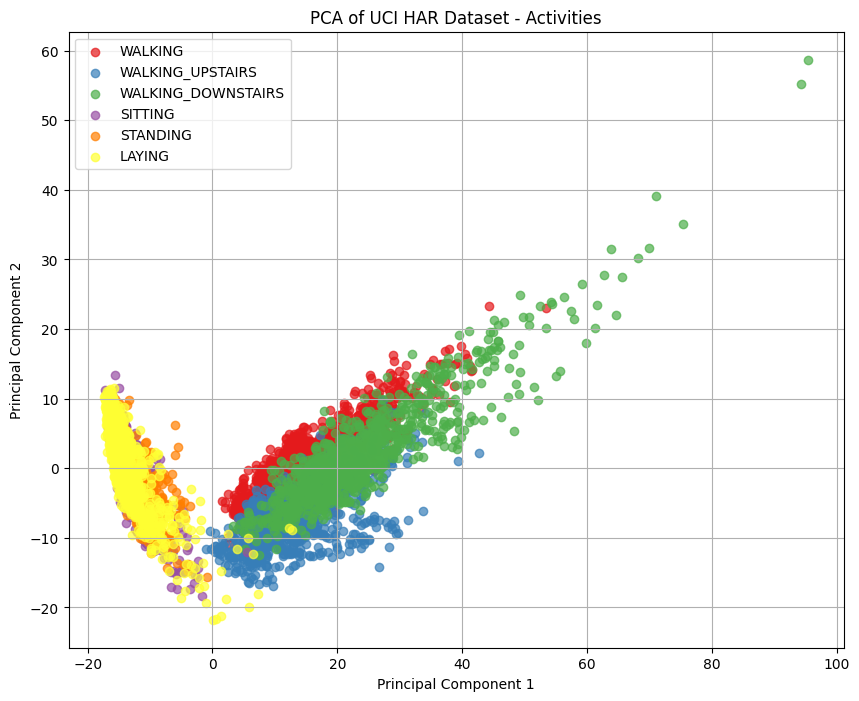

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

xtrain_path = r'train/X_train.txt'
ytrain_path = r'train/y_train.txt'

# Load the features and labels
xtrain = np.loadtxt(xtrain_path)
ytrain = np.loadtxt(ytrain_path, dtype=int)

# Standardize the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# PCA to reduce from 561 features to 2D
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# scatter plot
plt.figure(figsize=(10, 8))
activities = np.unique(ytrain)
colormap = plt.colormaps.get_cmap('Set1') 
colors = [colormap(i) for i in range(len(activities))]

for i, activity in enumerate(activities):
    plt.scatter(xtrain_pca[ytrain == activity, 0], xtrain_pca[ytrain == activity, 1],
                    color=colors[i], label=labels[activity], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of UCI HAR Dataset - Activities')
plt.legend()
plt.grid(True)
plt.show()

d. Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

When comparing PCA results on total acceleration, TSFEL features, and the dataset’s original features, TSFEL clearly provides a better view. By using TSFEL, we can generate features that are more specific to the activity recognition task, giving a stronger and more detailed representation of the signals.

PCA on total acceleration mostly highlights broad variations, while PCA on TSFEL-derived features brings out activity-specific traits more effectively. Since activities like walking, climbing stairs, or sitting each leave distinct signatures in the data, TSFEL features allow PCA to separate these classes more cleanly. Overall, TSFEL features give clearer clusters and make the differences between activities easier to see compared to using only total acceleration.

4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [10]:
import pandas as pd

# Standardize the TSFEL features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)

# Calculate the correlation matrix for TSFEL features
X_train_tsfel_df = pd.DataFrame(X_train_tsfel_scaled)
correlation_matrix_tsfel = X_train_tsfel_df.corr()

# Display the correlation matrix
print("Correlation Matrix of TSFEL Features:")
print(correlation_matrix_tsfel)

Correlation Matrix of TSFEL Features:
          0         1         2         3         4         5         6   \
0   1.000000 -0.209707  0.188140  0.448883  0.009752  0.443816  0.197790   
1  -0.209707  1.000000 -0.250115 -0.289225 -0.065848 -0.290407 -0.142194   
2   0.188140 -0.250115  1.000000  0.069575  0.060328  0.070869  0.056008   
3   0.448883 -0.289225  0.069575  1.000000  0.047129  0.993984  0.319136   
4   0.009752 -0.065848  0.060328  0.047129  1.000000  0.046619  0.011578   
5   0.443816 -0.290407  0.070869  0.993984  0.046619  1.000000  0.343646   
6   0.197790 -0.142194  0.056008  0.319136  0.011578  0.343646  1.000000   
7  -0.411594  0.278038 -0.012271 -0.796524 -0.054400 -0.815222 -0.400302   
8  -0.429732  0.088364 -0.126502 -0.658268 -0.010387 -0.648922 -0.375982   
9  -0.403949  0.270418 -0.011753 -0.797142 -0.055425 -0.815787 -0.397852   
10  0.391804 -0.256915  0.053122  0.961618  0.056171  0.946974  0.165882   
11 -0.023140 -0.482995  0.327382 -0.022591  0.1643

In [12]:
import numpy as np
import pandas as pd

xtrain_path = r'train/X_train.txt'
xtrain = np.loadtxt(xtrain_path)
xtrain_df = pd.DataFrame(xtrain)

# Calculate the correlation matrix for the original features
correlation_matrix_original = xtrain_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Original Features:")
print(correlation_matrix_original)

Correlation Matrix of Original Features:
          0         1         2         3         4         5         6    \
0    1.000000  0.148061 -0.256952  0.000619 -0.021903 -0.044617  0.006290   
1    0.148061  1.000000 -0.078769 -0.045160 -0.044920 -0.049746 -0.044180   
2   -0.256952 -0.078769  1.000000 -0.020217 -0.016641 -0.008410 -0.018747   
3    0.000619 -0.045160 -0.020217  1.000000  0.927461  0.851668  0.998632   
4   -0.021903 -0.044920 -0.016641  0.927461  1.000000  0.895510  0.922803   
..        ...       ...       ...       ...       ...       ...       ...   
556  0.037444  0.017967 -0.063609  0.018985 -0.008507 -0.018429  0.019389   
557  0.028844  0.075679 -0.034037 -0.024810 -0.014592 -0.006471 -0.024951   
558 -0.035257 -0.005309  0.008587 -0.371653 -0.380531 -0.345011 -0.368191   
559  0.034371  0.001053 -0.015288  0.471065  0.523600  0.476006  0.466424   
560  0.028242 -0.013903 -0.022643  0.394825  0.433169  0.482828  0.390922   

          7         8         9   

In [14]:
def find_redundant_features(correlation_matrix, threshold=0.95):
    redundant_features = []
    # Iterate through each pair of features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                redundant_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
    return redundant_features

# Identify redundant features in TSFEL with a threshold of 0.95
redundant_features_tsfel = find_redundant_features(correlation_matrix_tsfel, threshold=0.95)

print("Redundant Features in TSFEL Features (Threshold > 0.95):")
for feature_pair in redundant_features_tsfel:
    print(feature_pair)

Redundant Features in TSFEL Features (Threshold > 0.95):
(5, 3)
(9, 7)
(10, 3)
(12, 3)
(12, 5)
(12, 10)
(17, 3)
(17, 5)
(17, 12)
(19, 5)
(19, 17)
(23, 21)
(24, 17)
(26, 3)
(26, 5)
(26, 12)
(26, 17)
(26, 19)
(26, 24)
(33, 31)
(37, 35)
(40, 31)
(40, 33)


In [15]:
# Identify redundant features in original dataset with a threshold of 0.95
redundant_features_xtrain = find_redundant_features(correlation_matrix_original, threshold=0.95)

print("Redundant Features in Original Dataset Features (Threshold > 0.95):")
for feature_pair in redundant_features_xtrain:
    print(feature_pair)

Redundant Features in Original Dataset Features (Threshold > 0.95):
(6, 3)
(7, 4)
(8, 5)
(9, 3)
(9, 6)
(10, 4)
(12, 3)
(12, 6)
(13, 4)
(15, 3)
(15, 4)
(15, 6)
(15, 7)
(15, 9)
(15, 12)
(16, 6)
(19, 3)
(19, 6)
(19, 15)
(20, 4)
(20, 7)
(21, 5)
(21, 8)
(46, 43)
(47, 44)
(48, 45)
(49, 40)
(50, 41)
(51, 42)
(52, 40)
(52, 49)
(53, 41)
(53, 50)
(54, 42)
(54, 51)
(56, 40)
(56, 49)
(56, 52)
(59, 43)
(59, 46)
(60, 44)
(60, 47)
(61, 45)
(61, 48)
(66, 65)
(67, 65)
(67, 66)
(68, 66)
(68, 67)
(70, 69)
(71, 69)
(71, 70)
(72, 70)
(72, 71)
(74, 73)
(75, 73)
(75, 74)
(76, 73)
(76, 74)
(76, 75)
(83, 3)
(83, 6)
(83, 9)
(83, 12)
(83, 15)
(83, 19)
(84, 4)
(84, 13)
(84, 83)
(86, 3)
(86, 6)
(86, 9)
(86, 12)
(86, 15)
(86, 19)
(86, 83)
(86, 84)
(87, 4)
(87, 7)
(87, 83)
(87, 84)
(87, 86)
(88, 85)
(89, 83)
(89, 86)
(90, 84)
(90, 87)
(91, 85)
(92, 83)
(92, 86)
(93, 84)
(93, 87)
(94, 85)
(94, 88)
(95, 3)
(95, 6)
(95, 12)
(95, 15)
(95, 83)
(95, 84)
(95, 85)
(95, 86)
(95, 87)
(95, 88)
(97, 84)
(97, 87)
(99, 3)
(99, 6)